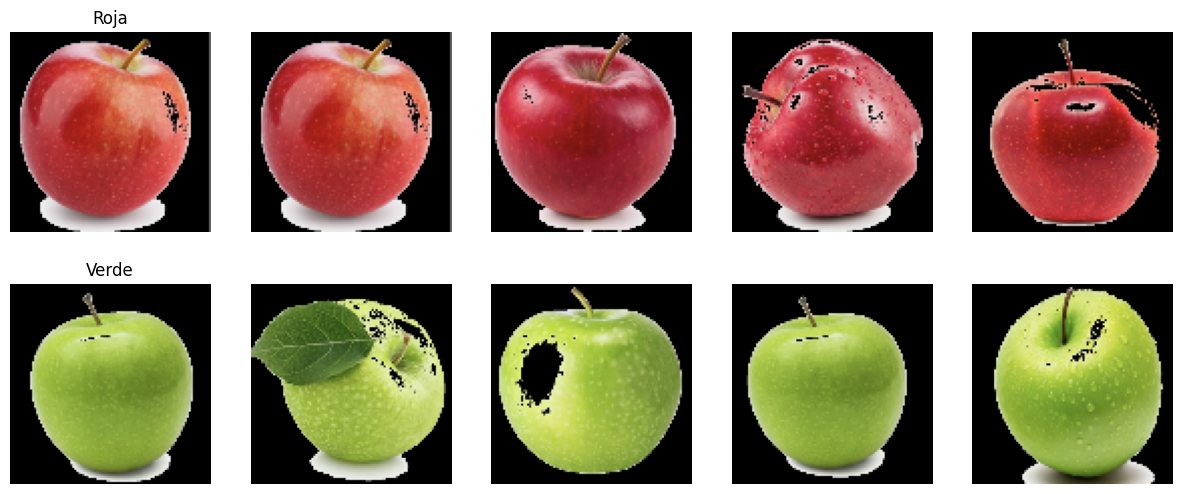

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Definir las rutas a las carpetas de train y test
train_dir = 'C:\\Users\\franc\\OneDrive\\Documentos\\ISTEA\\1er cuatrimestre 2025 - 4to de carrera\\Aprendizaje automatico II\\Datos\\datos_PDI\\datos_PDI\\Fruits_classification\\train'
test_dir = 'C:\\Users\\franc\\OneDrive\\Documentos\\ISTEA\\1er cuatrimestre 2025 - 4to de carrera\\Aprendizaje automatico II\\Datos\\datos_PDI\\datos_PDI\\Fruits_classification\\test'
classes = ['roja', 'verde']
image_size = (100, 100)  # Tamaño al que redimensionaremos las imágenes


def cambiar_cercanos_al_blanco_a_negro(img, umbral=240):
    """
    Cambia los valores cercanos al blanco por negro en la imagen.

    :param img: Imagen en formato BGR.
    :param umbral: Valor del canal de intensidad (V) en HSV. Los píxeles con valores
                   de intensidad mayores que este umbral se convertirán en negro.
    :return: Imagen con los valores cercanos al blanco cambiados a negro.
    """
    # Convertir la imagen de BGR a HSV
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Crear una máscara donde los valores de intensidad (V) son mayores que el umbral
    _, _, V = cv2.split(hsv_image)
    mascara = V > umbral
    # Crear una imagen de salida donde los valores cercanos al blanco se cambian a negro
    imagen_salida = img.copy()
    imagen_salida[mascara] = [0, 0, 0]
    return imagen_salida

# Función para cargar y redimensionar imágenes
def load_and_resize_images(base_dir, classes, num_images, size):
    images = []
    labels = []

    for fruit in classes:
        for i in range(1, num_images + 1):
            img_path = os.path.join(base_dir, f'{fruit}{i}.png')
            img = cv2.imread(img_path)
            # Verificar que la imagen se ha cargado correctamente
            if img is not None:
                img = cambiar_cercanos_al_blanco_a_negro(img)
                # Redimensionar imagen
                img_resized = cv2.resize(img, size)
                images.append(img_resized)
                labels.append(fruit)
            else:
                print(f"ERROR: no se pudo cargar imagen {img_path}")
    return images, labels

# Cargar y redimensionar imágenes y etiquetas de entrenamiento (5 imágenes por fruta)
train_images, train_labels = load_and_resize_images(train_dir, classes, num_images=5, size=image_size)

# Cargar y redimensionar imágenes y etiquetas de prueba (2 imágenes por fruta)
test_images, test_labels = load_and_resize_images(test_dir, classes, num_images=2, size=image_size)

# Configurar la visualización
num_classes = len(classes)
num_images_per_class = len([label for label in train_labels if label == classes[0]])

plt.figure(figsize=(15, num_classes * 3))  # Ajustar el tamaño según sea necesario

for idx, fruit in enumerate(classes):
    # Encontrar los índices de las imágenes de la fruta actual
    fruit_indices = [i for i, label in enumerate(train_labels) if label == fruit]
    # Mostrar todas las imágenes de la fruta en la fila correspondiente
    for j, image_idx in enumerate(fruit_indices):
        plt.subplot(num_classes, num_images_per_class, idx * num_images_per_class + j + 1)
        plt.imshow(cv2.cvtColor(train_images[image_idx], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        if j == 0:
            plt.title(fruit.capitalize())

plt.show()

La funcion "np.mean(imagen, axis=(0, 1))" calcula el promedio de los valores de la imagen a lo largo de los ejes 0 y 1, que corresponden a las filas y columnas, ancho y alto.
Esto significa que para cada canal (B, G y R), se calcula el valor promedio de todos los pixeles.
El resultado es un vector con 3 valores, uno por cada canal, que representa el color promedio de la imagen.

"train_images" y "test_images" son listas de imagenes cargadas y preprocesadas.

"[extraer_color_promedio(img) for img in train_images]"

Es una lista por comprension que recorre cada imagen en "train images" y para cada una de ellas calcula el vector de color promedio (3 valores). Devuelve una lista de vectores, un vector por cada imagen.

En "x_train" e "y_train", "np.array" convierte la lista de vectores en un arreglo Numpy bidimensional de forma (n_imagenes, 3) donde n_imagenes es la cantidad de imagenes de entrenamiento.

"y_train" e "y_test" convinerten la lista de etiquetas en arrays para poder usarlos luego en el modelo de ML.

In [ ]:
def extraer_color_promedio(imagen):
    return np.mean(imagen, axis=(0, 1))  # Promedio por canal BGR

X_train = np.array([extraer_color_promedio(img) for img in train_images])
y_train = np.array(train_labels)

X_test = np.array([extraer_color_promedio(img) for img in test_images])
y_test = np.array(test_labels)

Ahora vamos a entrenar y evaluar el modelo de clasificacion usando K-Nearest Neighbours (KNN).
"KNeighborsClassifier" es un modelo de aprendizaje supervisado que clasifica una muestra basandose en las etiquetas de sus k vecinos mas ceranos.
Se crea un clasificador KNN con k = 3, cuando el modelo tenga que predecir la clase de una imagen nueva va a buscar los 3 vectores mas cercanos en el conjunto de entrenamiento y va a tomar una votacion por mayoria entre ellos para decidir la clase. La distancia entre los vectores se calcula con la distancia Euclidea.
Con "clf.fit(x_train, y_train)" entrenamos el modelo. En el caso de KNN, el entrenamiento no implica ajustar parametros. Lo que hace KNN es almacenar los vectores del conjunto de entrenamiento y sus clases para usarlos cuando se necesite hacer una prediccion.
La prediccion el modelo la hace tomando cada imagen del conjunto de prueba (x_test), calcula su vector de color promedio y busca los 3 vecinos mas cercanos en x_train, luego predice la clase basandose en la mayoria de los vecinos.
Con accuracy score nos da el rendimiento del modelo, arrojando una precision de 1, hacerto todas las imagenes.

Usando un vector de 3 caracteristicas (color promedio BGR, azul verde o rojo) para cada imagen, y el modelo aprende a distinguir entre frutas rojas y verdes en base a su color

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred))

Precisión: 1.0


In [ ]:
#Mostrar predicciones
plt.figure(figsize=(10, 4))
for i in range(len(test_images)):
    plt.subplot(1, len(test_images), i + 1)
    plt.imshow(cv2.cvtColor(test_images[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Pred: {y_pred[i]}\nReal: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

#**Respuestas ANÁLISIS DE RESULTADOS**

**Grupo**: Arcagni, Franco; Iglesias Barrera, Ailén.

- *Extracción de características: cuál fue la aproximación, pasos seguidos (diagrama en bloque) y parámetros elegidos.*

La elección final presentada para este trabajo fue pensar la extracción de características que se basó en procesar imágenes (luego de normalizarlas) para poder obtener un vector a partir del valor promedio de color BGR (Azul, Verde y Rojo) de cada imagen.
Esto lo trabajamos en grupo en dos modelos, al final decantamos por el presentado, pero también hicimos una prueba utilizando el perfil de color HSV, el concepto que ambos coincidimos es pensar la extracción de color y generar un promedio de los mismos (en el caso que no dejamos, se realizaba por bandas de lower green y upper green también con las dos franjas de rojo y generando un promedio de verde y otro de rojo, pasando esa información al modelo y de ese modo correr una regresión logística).
En ambos casos la búsqueda fue similar luego de conversar nos pareció más directo esta solución presentada.

*El diagrama en bloques del proceso sería:*
Extracción de características y clasificación:
Carga de imágenes --> Lectura de imágenes -->
Limpieza de fondos blancos a negros --> Redimensionamiento a 100 x 100 -->
Promedio de color BGR --> Vector de características (3 valores, una dimensión para cada color) -->
División de datos en conjuntos de prueba y entrenamiento --> Entrenamiento del modelo KNN -->
Predición con el modelo KNN --> Evaluación (Accuracy).

Parámetros elegidos:
* redimensionamiento: se redimensionaron las imágenes en 100x100px
* promedio de color BGR: para cada valor se calculó el promedio de cada uno de los 3 canales, azul verde y rojo.
* numero de vecinos k, se eligió el k = 3 teniendo en cuenta los promedios elegidos, uno para cada canal.

- *Clasificación: mencionar la técnica utilizada -no explicar teóricamente-.*

Se eligió el modelo de clasificación KNN K- Nearest Neighbors. Para agrupar las imágenes de pruebas a alguna de las 3 grupos asignados y de esta forma determinar si la nueva imagen pertenece a alguno de los grupos (manzanas verdes o rojas).

- *Evaluación: explicar cómo se llevó a cabo el análisis del rendimiento del modelo (proceso elegido y resultados).*

Para la evaluación se utilizó el conjunto de predicción con el modelo entrenado sobre las características de las imágenes en el conjutno de prueba (test_images).
Se calcularon las métricas:
**Accuracy**: se calcula la exactitud general del modelo.
Resultados: Precisión: 1.0 (donde indica que el modelo clasfició correctamente todas las imágenes -es un número tan exacto debido a que el conjunto de datos es muy pequeño).

- *Mostrar algunos ejemplos de predicciones correctas y algunos de incorrectas (si surgieran).*

Se puede visualizar cuando se corre el último fragmento:

```
#Mostrar predicciones
plt.figure(figsize=(10, 4))
for i in range(len(test_images)):
    plt.subplot(1, len(test_images), i + 1)
    plt.imshow(cv2.cvtColor(test_images[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Pred: {y_pred[i]}\nReal: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
```

